In [172]:
import pandas as pd
import numpy as np
df = pd.read_csv("Ecommerce_Customers (2).csv")
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [176]:
df.shape

(500, 8)

In [178]:
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [180]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [182]:
df.duplicated().sum()

0

In [184]:
df = df.drop(columns=['Email','Address','Avatar'])

In [186]:
df.shape

(500, 5)

In [81]:
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


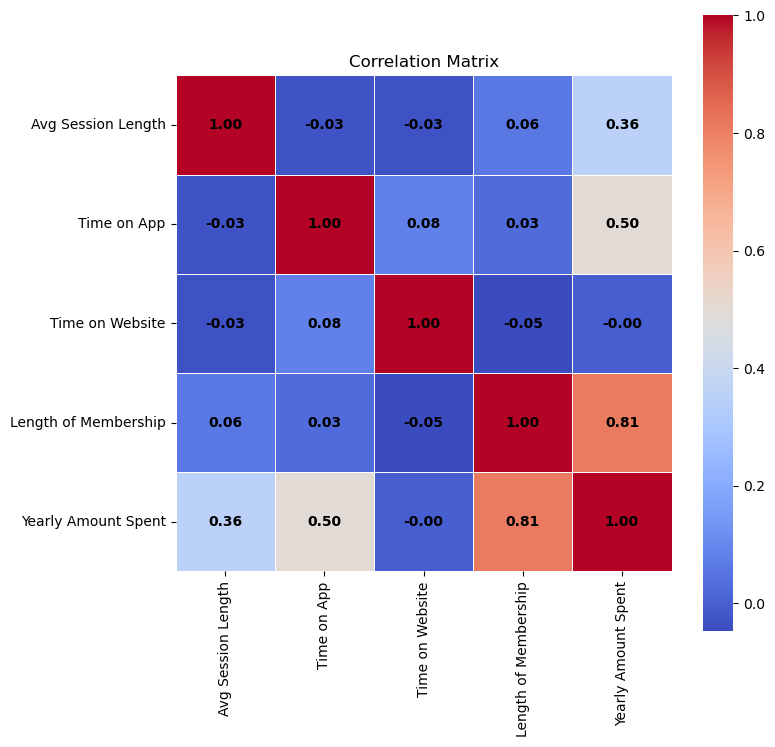

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10, "weight": "bold", "color": "Black"})
plt.title('Correlation Matrix')
plt.show()


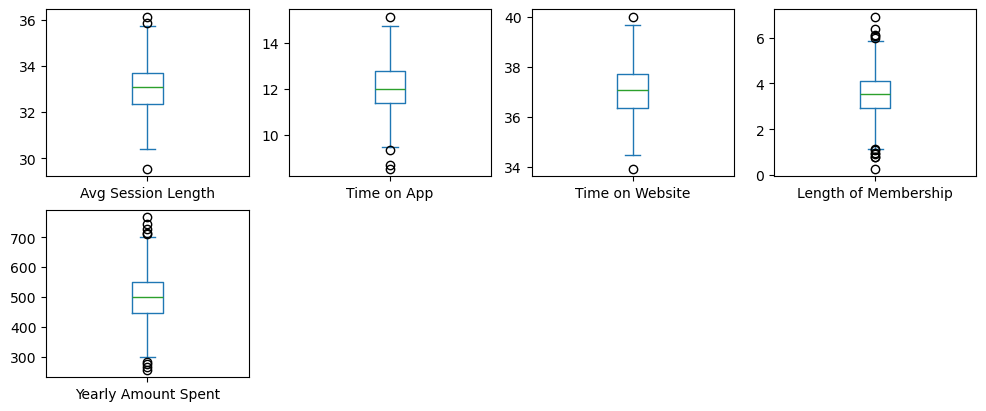

In [83]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

In [84]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for specified columns
for col in df.columns:
    df = remove_outliers_iqr(df, col)


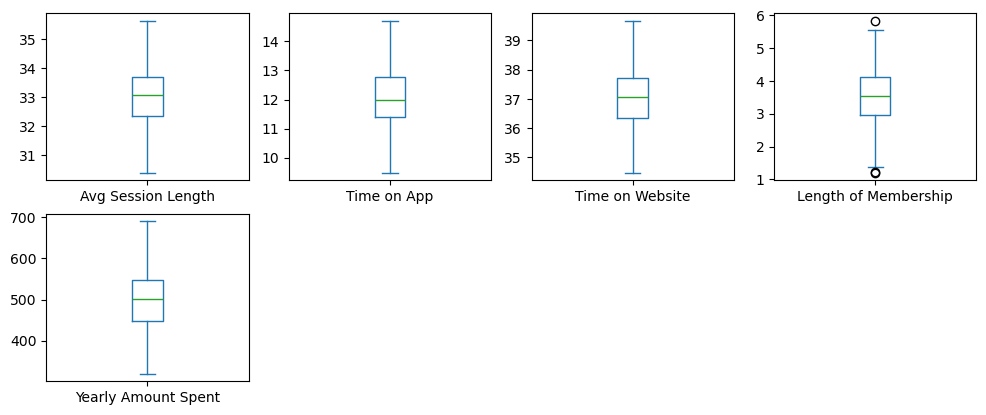

In [85]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

array([[<Axes: title={'center': 'Avg Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

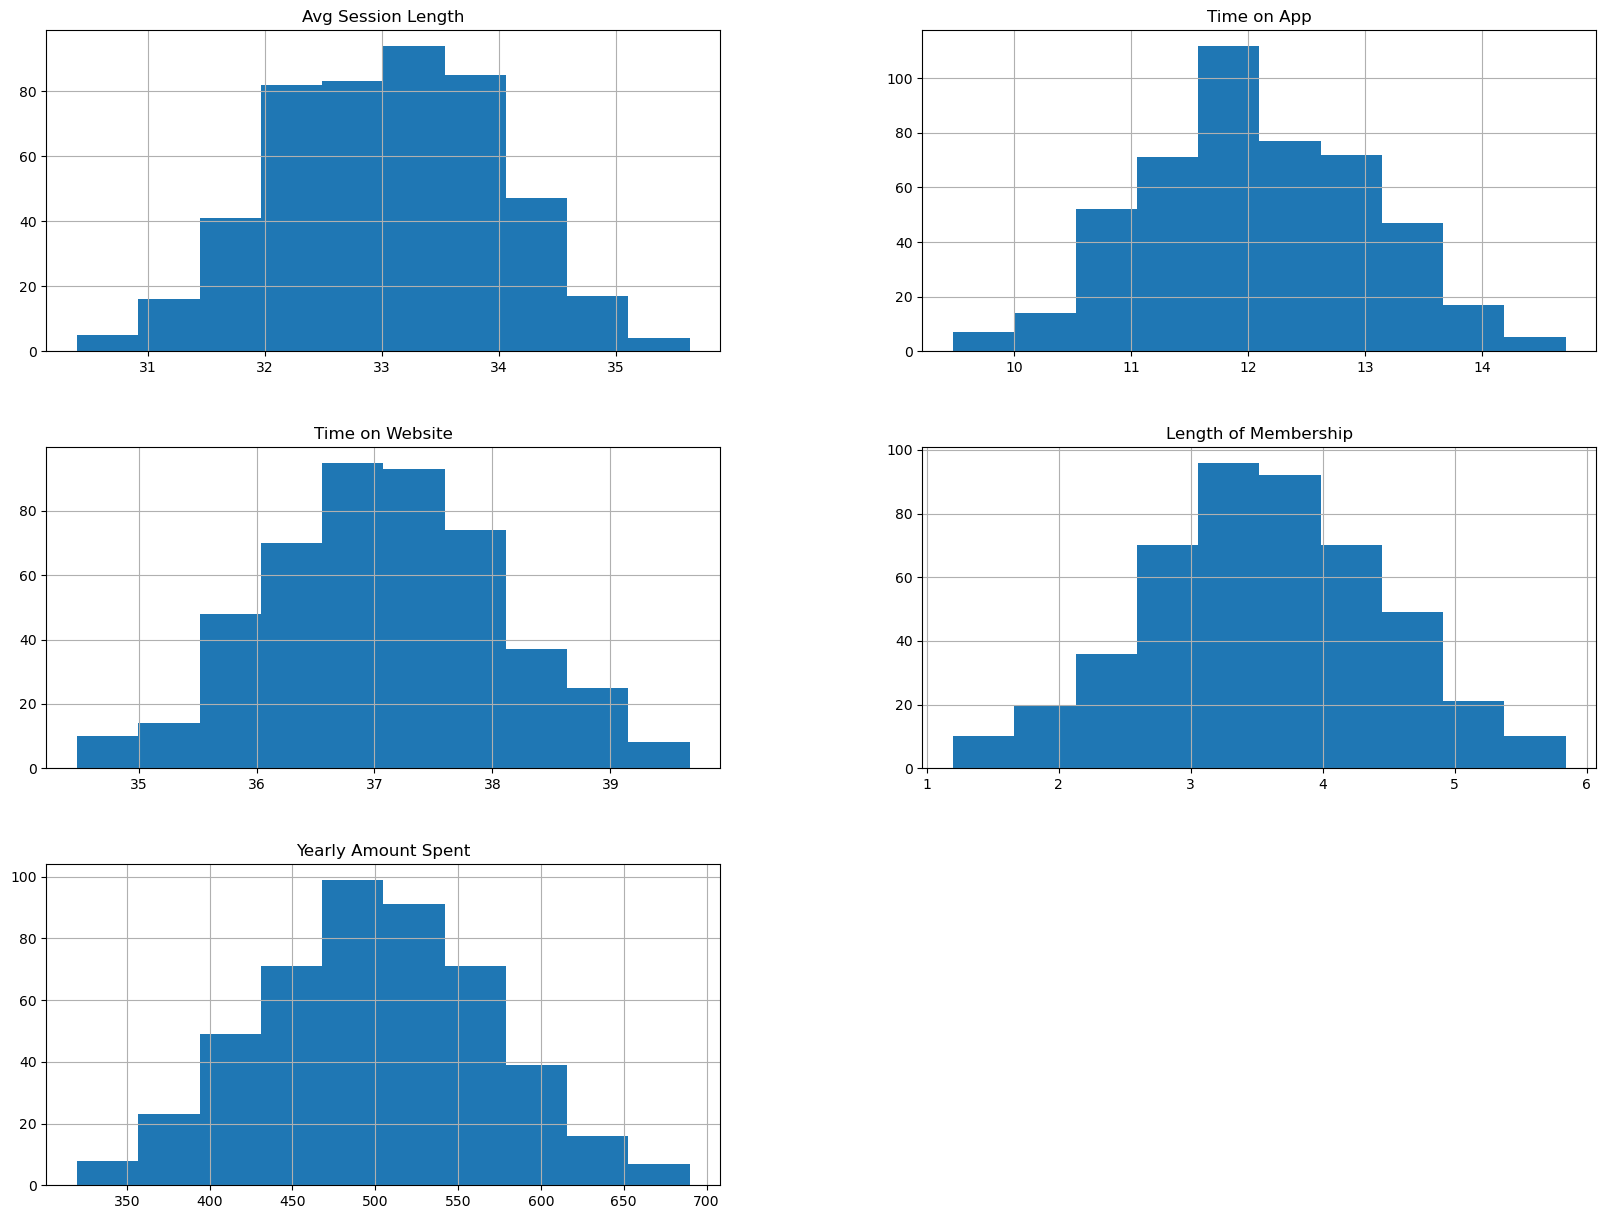

In [86]:
df.hist(figsize=(20, 15))

<Axes: xlabel='Yearly Amount Spent', ylabel='Avg Session Length'>

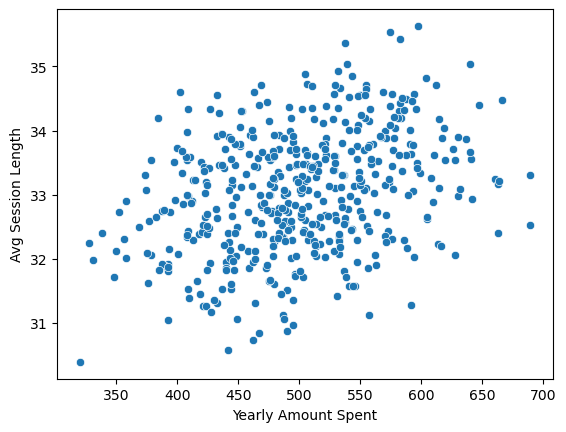

In [87]:
sns.scatterplot(y = df['Avg Session Length'], x = df['Yearly Amount Spent'])

<Axes: xlabel='Yearly Amount Spent', ylabel='Time on App'>

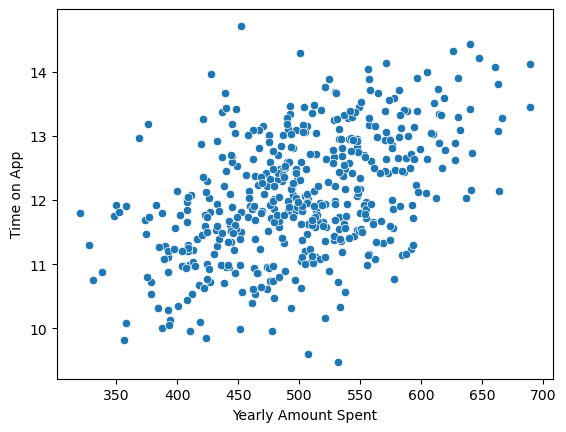

In [88]:
sns.scatterplot(y = df['Time on App'], x = df['Yearly Amount Spent'])

<Axes: xlabel='Yearly Amount Spent', ylabel='Time on Website'>

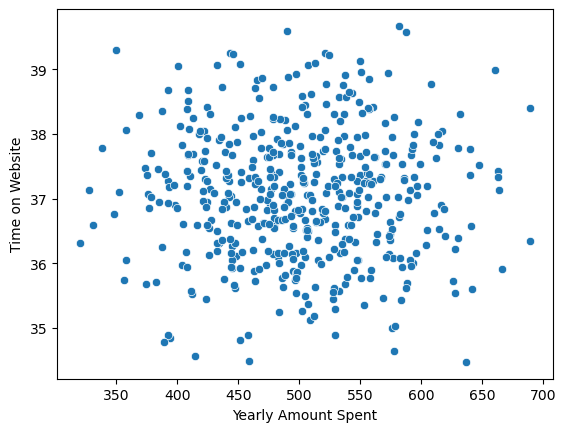

In [89]:
sns.scatterplot(y = df['Time on Website'], x = df['Yearly Amount Spent'])

<Axes: xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

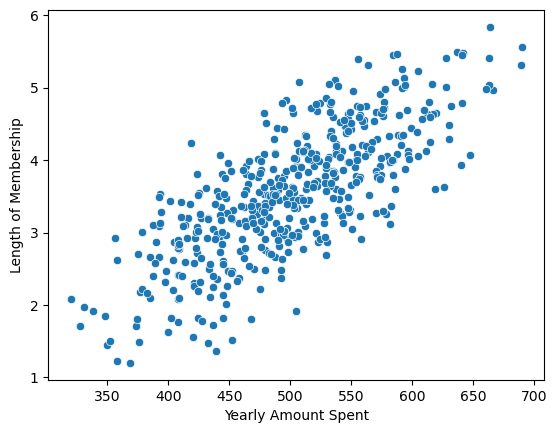

In [90]:
sns.scatterplot(y = df['Length of Membership'], x = df['Yearly Amount Spent'])

In [91]:
#lmplot to show how data is scattered along the regression line

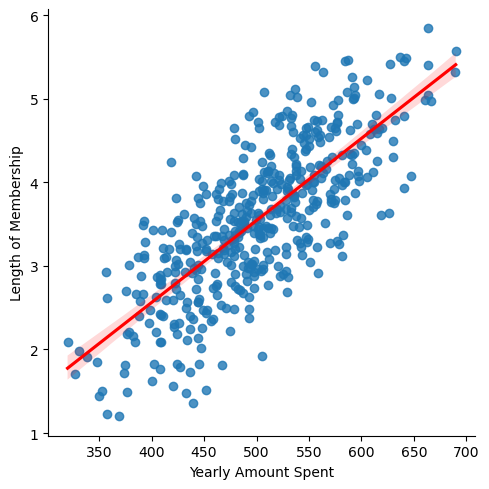

In [92]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership', data=df, 
           line_kws={'color':'red'})



The above plot show that the variable 'Length of Membership' has the highest correlation with the target variable. The correlation is strong and directly proportional.


In [94]:
#Model Building
x=df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [95]:
x

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [96]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 474, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
x_train


,Avg Session Length,Time on App,Time on Website,Length of Membership
165,32.047801,12.718039,37.661107,3.675849
479,34.606242,11.761884,38.126520,1.820811
23,32.903251,11.657576,36.772604,3.919302
327,31.128090,13.278956,37.387181,4.626075
48,33.117219,11.864126,36.582728,3.202531
...,...,...,...,...
111,32.012301,12.178331,37.715986,3.722561
284,31.312350,11.684904,38.717076,3.594295
366,33.100358,11.832112,36.841492,3.612239
461,32.770492,11.371767,35.261498,4.034386


In [99]:
x_test

,Avg Session Length,Time on App,Time on Website,Length of Membership
454,32.641946,11.588949,36.322141,3.189610
466,34.211461,10.770249,34.649800,4.985205
9,31.936549,11.814128,37.145168,3.202806
494,33.431097,13.350632,37.965972,2.768852
41,33.019548,10.634561,37.496690,4.646120
...,...,...,...,...
204,34.595777,11.332488,35.459863,4.541695
186,32.484260,10.933252,36.545506,3.261325
321,33.674027,12.968893,37.333107,3.229451
217,32.122365,11.435534,36.223557,4.852842


In [100]:
y_train

165    513.450571
479    402.167122
23     519.340989
327    557.252687
48     479.731949
          ...    
111    492.945053
284    463.591418
366    502.092528
461    502.771075
107    378.330907
Name: Yearly Amount Spent, Length: 379, dtype: float64

In [101]:
y_test

454    432.481169
466    577.736025
9      427.199385
494    510.661792
41     501.874430
          ...    
204    568.717576
186    425.745092
321    542.412477
217    528.933619
252    426.154548
Name: Yearly Amount Spent, Length: 95, dtype: float64

In [102]:
x.shape,y.shape

((474, 4), (474,))

In [103]:
x_train.shape,y_train.shape

((379, 4), (379,))

## Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [106]:
from sklearn import metrics
from decimal import Decimal

In [107]:
result=[]
def modelperformance(test,pred):
    mae=metrics.mean_absolute_error(test,pred)
    mse=metrics.mean_squared_error(test,pred)
    rmse=np.sqrt(metrics.mean_squared_error(test,pred))
    r2=metrics.r2_score(test,pred)
    #input("name of the model:")
    print(f"Mae: {mae}\nMSE:{mse}\nRmse:{rmse}\n"+'*'*25)
    print(f'R2 Score{r2}')
    r=[mae,mse,rmse,r2]

    r=list(map(lambda x:round((x),2),r))
    result.extend(r)

    

In [108]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
y_train_pred

array([508.39818088, 422.77756217, 503.65804581, 565.10570835,
       472.86918069, 505.53030024, 547.80827426, 570.31149157,
       673.28866483, 606.73540411, 542.97416481, 532.12740557,
       649.23457682, 608.9482148 , 456.90870775, 610.50595637,
       494.20746272, 607.36722756, 488.83182811, 511.56320879,
       423.34850259, 451.72751444, 531.33217698, 402.07663204,
       433.48029367, 488.23038965, 567.61163748, 443.36965975,
       463.80960554, 458.24410681, 391.30929731, 543.28890349,
       549.24176395, 399.55169556, 542.31700904, 639.10553867,
       570.31132967, 562.87779159, 411.2480995 , 677.69449522,
       434.0519989 , 570.89161763, 394.72085118, 470.37736196,
       413.91283555, 594.17766431, 575.02281817, 459.01021536,
       497.03122981, 425.69869603, 521.15192261, 558.65580252,
       532.34329342, 425.53993988, 472.39887584, 563.51903599,
       491.24746513, 577.17446596, 554.3514063 , 518.54059299,
       598.71638453, 519.64406373, 536.58203048, 324.50

In [109]:
y_test_pred

array([448.92068057, 567.52558026, 440.74557313, 512.9407345 ,
       511.99991101, 517.31196329, 347.07789897, 556.69164931,
       468.42584831, 481.33239724, 495.56178668, 526.55057003,
       573.6179889 , 570.68975614, 483.16832664, 549.7104831 ,
       336.85584867, 472.19548582, 575.94670504, 501.80171171,
       397.35270328, 595.33650494, 444.5782708 , 513.45225495,
       554.01065801, 578.01601187, 558.74243435, 562.40877681,
       513.09064845, 446.92833084, 374.49700754, 356.51548462,
       515.32398532, 619.76969073, 434.61732458, 596.52207709,
       383.58858381, 505.0784322 , 534.64651739, 572.59107184,
       448.12260116, 519.90233125, 573.42144848, 475.42460554,
       580.28988987, 530.33112908, 548.47127296, 423.01912038,
       498.81957788, 508.38527815, 584.59407885, 502.68053406,
       455.9714143 , 540.55413481, 554.56970473, 339.49929712,
       493.06583131, 478.23045787, 610.44695066, 511.64051663,
       599.66149386, 419.55853735, 486.86340946, 552.22

In [110]:
from sklearn.metrics import r2_score
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

print("Trainning R2 score:",train_r2)
print("Testing R2 score:", test_r2)


Trainning R2 score: 0.9789333454037833
Testing R2 score: 0.9785595417268145


In [111]:
model.score(x_test,y_test)

0.9785595417268145

In [112]:
model.score(x_train,y_train)

0.9789333454037833

In [113]:
modelperformance(y_test,y_test_pred)

Mae: 7.79054217830283
MSE:92.51168957716641
Rmse:9.618299723816389
*************************
R2 Score0.9785595417268145


## KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsRegressor


In [116]:
knn=KNeighborsRegressor(n_neighbors=7)

In [117]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [144]:
knn_pred=knn.predict(x_test)
knn_pred

array([459.31703425, 548.36663638, 447.04018994, 535.3554546 ,
       491.47242485, 513.2189296 , 401.87358525, 560.03521782,
       485.6510778 , 482.27384751, 468.43192592, 517.92246884,
       573.62202527, 558.64134252, 490.65139842, 542.27417486,
       392.81627274, 477.37501687, 576.92661708, 507.38924845,
       424.91016437, 539.07481803, 449.18815443, 527.8471039 ,
       559.18759386, 542.56717987, 528.47632547, 559.97549313,
       522.45116197, 449.67520971, 408.08126956, 389.83281   ,
       496.02185344, 615.12416221, 434.06837298, 580.92457215,
       405.69780361, 503.2891033 , 530.65683689, 549.3496004 ,
       448.80609188, 521.59091957, 566.61290146, 478.61801593,
       580.77842025, 532.95304521, 544.78996353, 439.45874   ,
       508.12256729, 498.86157278, 576.25824242, 491.74617945,
       453.42165093, 535.00928695, 543.70559469, 397.6234835 ,
       495.51352826, 487.09524841, 568.66767789, 494.43203088,
       573.49804842, 433.28212382, 499.24076896, 545.79

In [119]:
modelperformance(y_test,knn_pred)

Mae: 15.948484980288923
MSE:424.399212532456
Rmse:20.60095173851092
*************************
R2 Score0.9016414720230037


## SVM

In [121]:
from sklearn.svm import SVR

In [122]:
#svc=SVR()
svr=SVR(kernel='linear')


In [123]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [124]:
svr.score(x_train,y_train)

0.9770997651609021

In [125]:
svr.score(x_test,y_test)

0.9788024740940585

In [126]:
svr_pred=svr.predict(x_test)

In [127]:
modelperformance(y_test,svr_pred)

Mae: 7.8237306847912995
MSE:91.46348046426547
Rmse:9.563654137633035
*************************
R2 Score0.9788024740940585


## Lasso Regression

In [129]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# after lasso, train accuracy will decrease but test accuracy will increase
l1 = Lasso() # alpha = 0.1 by default
l1.fit(x_train,y_train)
l1.score(x_train,y_train),l1.score(x_test,y_test)
# we got same accuracy and overfitted model

(0.9781225913883725, 0.9791178979919699)

In [193]:
l1_pred=l1.predict(x_test)
l1_pred

array([450.84145209, 567.06385316, 442.74565792, 511.59319211,
       512.01749171, 515.80902148, 351.1415548 , 555.26432391,
       468.97141206, 482.09165757, 495.07106021, 526.11758769,
       571.51421033, 569.69562242, 483.99991198, 548.80408946,
       340.87747364, 472.94588543, 574.03305464, 500.70321064,
       400.95085867, 590.96698581, 446.42749617, 512.86285452,
       551.96866938, 577.07544331, 557.51261416, 559.89578691,
       512.35696708, 449.02908993, 378.08612799, 359.9612801 ,
       514.91748663, 616.30222938, 436.18166334, 593.96454328,
       387.18815087, 504.51015618, 534.65829254, 571.36081548,
       448.83651767, 519.6612326 , 571.12106493, 475.556363  ,
       578.60373161, 529.80213322, 546.99823205, 425.27300405,
       498.91538898, 509.92788336, 582.00357621, 502.0565049 ,
       456.62186243, 540.03782876, 553.31532527, 343.78411078,
       492.92424321, 479.30389276, 607.61855489, 512.13360025,
       596.87862496, 421.15525804, 487.96285853, 550.33

In [196]:
modelperformance(y_test,l1_pred)

Mae: 7.761506477982043
MSE:90.10248354167186
Rmse:9.492232800646635
*************************
R2 Score0.9791178979919699


## Ridge Regression 

In [133]:
l2 = Ridge()
l2.fit(x_train,y_train)
l2.score(x_train,y_train),l1.score(x_test,y_test)

(0.9789225397576558, 0.9791178979919699)

In [134]:
for i in range(1,100):
  l2 = Ridge(alpha = i)
  l2.fit(x_train,y_train)
  print(f"Alpha: {i} Train: {l2.score(x_train,y_train)} Test: {l2.score(x_test,y_test)}")
  # alpha = 6 to 10 same train and test accuracies

Alpha: 1 Train: 0.9789225397576558 Test: 0.9787107225981184
Alpha: 2 Train: 0.9788904091581915 Test: 0.9788383714184647
Alpha: 3 Train: 0.9788373767254296 Test: 0.9789429450508067
Alpha: 4 Train: 0.9787638572114378 Test: 0.9790248913811369
Alpha: 5 Train: 0.9786702571837285 Test: 0.9790846495147316
Alpha: 6 Train: 0.9785569752041638 Test: 0.9791226499675719
Alpha: 7 Train: 0.9784244020034715 Test: 0.979139314853077
Alpha: 8 Train: 0.9782729206514947 Test: 0.9791350580642758
Alpha: 9 Train: 0.97810290672329 Test: 0.9791102854515414
Alpha: 10 Train: 0.9779147284611872 Test: 0.9790653949960122
Alpha: 11 Train: 0.9777087469329216 Test: 0.9790007769788119
Alpha: 12 Train: 0.9774853161859441 Test: 0.978916814146187
Alpha: 13 Train: 0.9772447833980117 Test: 0.9788138818706676
Alpha: 14 Train: 0.9769874890241601 Test: 0.9786923483083613
Alpha: 15 Train: 0.9767137669401542 Test: 0.9785525745524831
Alpha: 16 Train: 0.9764239445825111 Test: 0.9783949147832222
Alpha: 17 Train: 0.9761183430851874 T

In [135]:
l2 = Ridge(alpha = 8)
l2.fit(x_train,y_train)
l2.score(x_train,y_train),l2.score(x_test,y_test)

(0.9782729206514947, 0.9791350580642758)

In [200]:
l2_pred=l2.predict(x_test)

In [203]:
modelperformance(y_test,l2_pred)

Mae: 7.708110720604536
MSE:90.0284409413666
Rmse:9.488331831326652
*************************
R2 Score0.9791350580642758


## ElasticNet

In [138]:
en = ElasticNet(alpha = 1) # default alpha=0.1
en.fit(x_train,y_train)
en.score(x_train,y_train),en.score(x_test,y_test)

(0.8261413735374473, 0.8371928724945245)

In [146]:
ElasticNet_y_pred=en.predict(x_test)
ElasticNet_y_pred

array([469.40741738, 541.62079774, 464.10805818, 507.94773169,
       506.97533734, 510.1259558 , 408.2149293 , 534.24421598,
       481.22421769, 488.87355581, 496.41813849, 516.46688622,
       544.63768176, 543.02129164, 490.42692208, 530.6683636 ,
       401.22430497, 483.88113391, 546.41023072, 501.29314977,
       437.74579376, 557.21221759, 466.4960048 , 508.32609257,
       532.27549835, 547.62907992, 535.63738066, 537.84754201,
       508.31257239, 468.39689294, 423.96470476, 413.52119473,
       509.70335816, 572.7359727 , 460.42490793, 558.50889162,
       429.59871814, 503.00244049, 521.29571905, 544.80866987,
       467.89781985, 512.31715239, 544.81558564, 485.59968151,
       548.76967302, 517.75558975, 529.23374075, 453.93398033,
       498.75828236, 505.28180512, 550.45735717, 500.94146617,
       472.88173837, 525.20680268, 533.56731783, 402.50780915,
       495.9378118 , 487.13473415, 567.65622066, 507.63259456,
       560.83289321, 451.15655779, 492.3195149 , 531.58

In [140]:
modelperformance(y_test,ElasticNet_y_pred)

Mae: 21.71273946537561
MSE:702.4832328128648
Rmse:26.504400253785498
*************************
R2 Score0.8371928724945245


## Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn import calibrationtree

In [151]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)
y_pred_tree_reg = tree_reg.predict(x_test)

In [153]:
modelperformance(y_test,y_pred_tree_reg)

Mae: 18.850972609527233
MSE:555.8157980901302
Rmse:23.575745971021366
*************************
R2 Score0.8711844364642317


## Random Forest Regression

In [155]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [157]:
# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [205]:
rf_pred=rf_regressor.predict(x_test)

In [208]:
modelperformance(y_test,rf_pred)

Mae: 11.67144307790765
MSE:229.34520607973286
Rmse:15.144147585114617
*************************
R2 Score0.9468470812328421


## ANN


In [161]:
!pip install -U keras-tuner

In [162]:
!pip install tensorflow


In [163]:
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense

ann = Sequential()

ann.add(Dense(units=30, activation='relu'))# hidden layer1
ann.add(Dense(units=20, activation='relu'))# hidden layer2

ann.add(Dense(units=1))# output layer.
#In Regression task no activation function is required in output layer as we don't have to convert price to 0 or 1

ann.compile(optimizer='adam',loss = 'mse')

ann.fit(x_train,y_train, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 252144.4062 - val_loss: 247035.3906
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248693.7188 - val_loss: 239727.7031
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240321.7344 - val_loss: 232312.0781
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 230945.3906 - val_loss: 223762.0156
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 215723.4062 - val_loss: 213943.0938
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208880.7344 - val_loss: 202561.5000
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199378.4062 - val_loss: 189528.7812
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182580.7500 - val_loss: 174891.3281
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168323.9219 - val_loss: 158671.5938
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150305.3906 - val_loss: 141218.4375
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [164]:
yp = ann.predict(x_test)
yp

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[489.27933],
       [498.33664],
       [490.51254],
       [508.31857],
       [504.0545 ],
       [513.9272 ],
       [477.66882],
       [510.15488],
       [500.58597],
       [496.28934],
       [508.7833 ],
       [503.91837],
       [510.9318 ],
       [502.78888],
       [493.42465],
       [502.8024 ],
       [484.42465],
       [496.27002],
       [505.78976],
       [509.98145],
       [484.3295 ],
       [530.10223],
       [491.41733],
       [504.99356],
       [513.0861 ],
       [498.1702 ],
       [502.43747],
       [516.5729 ],
       [505.06274],
       [488.68802],
       [485.13266],
       [483.94455],
       [500.58945],
       [515.0992 ],
       [494.9495 ],
       [510.17358],
       [482.8481 ],
       [505.35226],
       [497.9584 ],
       [500.52136],
       [503.82828],
       [498.57578],
       [509.272  ],
       [498.82385],
       [507.6406 ],
       [507.05322],
       [508.92014],
       [488.9672 ],
       [505.14816],
       [486.49197],


In [188]:
modelperformance(y_test,yp)

Mae: 45.71770683748891
MSE:3288.7910152860672
Rmse:57.34798178912722
*************************
R2 Score0.23779160390696885


In [222]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



# List of models predictions
model_predictions = [y_test_pred,knn_pred,svr_pred,l1_pred,l2_pred,ElasticNet_y_pred,y_pred_tree_reg,rf_pred,yp]
model_names = ["LR", "KNN","SVM","Lasso Regression","Ridge Regression","Elastic net"," Decision tree","Random Forest","ANN"]

# Initialize an empty list to store the metrics for each model
metrics_list = []

# Calculate metrics for each model and store in the list
for i, y_pred in enumerate(model_predictions):
    
    mae=metrics.mean_absolute_error(y_test,y_pred)
    mse=metrics.mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    r2=metrics.r2_score(y_test,y_pred)

    # Store the metrics in a dictionary
    metrics_dict = {
        "Model":model_names[i],
        "MAE":mae,
        "MSE":mse,
        "RMSE":rmse,
        "R2_score":r2
    }

    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

              Model        MAE          MSE       RMSE  R2_score
0                LR   7.790542    92.511690   9.618300  0.978560
1               KNN  15.948485   424.399213  20.600952  0.901641
2               SVM   7.823731    91.463480   9.563654  0.978802
3  Lasso Regression   7.761506    90.102484   9.492233  0.979118
4  Ridge Regression   7.708111    90.028441   9.488332  0.979135
5       Elastic net  21.712739   702.483233  26.504400  0.837193
6     Decision tree  18.850973   555.815798  23.575746  0.871184
7     Random Forest  11.671443   229.345206  15.144148  0.946847
8               ANN  45.717707  3288.791015  57.347982  0.237792


## Conclusion:
Ridge and Lasso and Linear regression is giving the good accuracy as comapred to other models.
